## <span style="color:Darkred"> CU_DOW-CAN_S Sounding Converter </span>
---
<div class="alert alert-block alert-success">
<b>Notes:</b> Environment needs to be "daes_may 21"
</div>

#### <span style="color:Darkred"> Input File Information Here! </span>

In [1]:
# SOUNDING CSV FILE GOES HERE!
file = '/network/rit/home/je845911/minlab/je845911/data/sounding/iop4/sounding/csv/upperair.sounding.202202180700.CU_DOW-CAN_S.csv'

# DATE / TIME INFORMATION FROM FILENAME GOES HERE
# Will only be used in the figure title and savetitle.
YYYY = '2022'
MM = '02'
DD = '18'
HH = '07'
KK = '00'

# LOCATION @ WHICH RAOB LAUNCH OCCURED 
# Will only be used in the figure title and savetitle.
Site = 'CU_DOW-CAN_S'

#### <span style="color:Darkred"> Run This Cell After Inputing File Information </span>

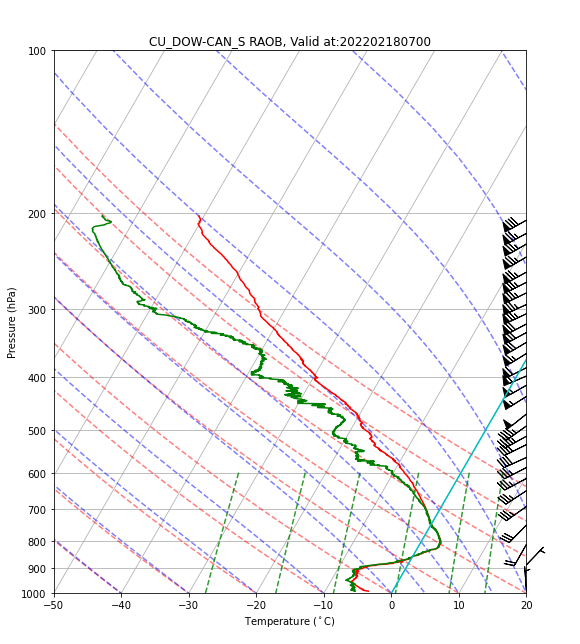

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import metpy.calc as mpcalc
from metpy.plots import Hodograph, SkewT
from metpy.units import units
from datetime import datetime, timedelta
import pandas as pd
import metpy.plots as plots

df = pd.read_csv(file, quotechar="'")

df.rename(columns= {
    '/Row/@Altitude':'Altitude',
    '/Row/@DataSrvTime':'Time', 
    '/Row/@Dropping':'...',
    '/Row/@East':'...',
    '/Row/@Height':'Height',
    '/Row/@Humidity':'Humidity',
    '/Row/@North':'...',
    '/Row/@Pressure':'Pressure',
    '/Row/@PtuStatus':'...',
    '/Row/@RadioRxTimePk':'...',
    '/Row/@SoundingIdPk':'...',
    '/Row/@Temperature':'Temperature',
    '/Row/@Up':'...',
    '/Row/@WindDir':'Wind Direction',
    '/Row/@WindEast':'Wind U',
    '/Row/@WindInterpolated':'...',
    '/Row/@WindNorth':'Wind V',
    '/Row/@WindSpeed':'Wind Speed',
    '/Row/@Latitude':'Latitude',
    '/Row/@Longitude':'Longitude',
},inplace = True)

#Changes Data read into Pandas so we can get rid of errors in data 
# at alttitudes above 200hPa that we dont use in the sounding.
n = 0  # TOA Problems
df.drop(df.tail(n).index,
        inplace = True)

df.drop_duplicates(inplace=True,subset='Pressure',ignore_index=True)
p = df['Pressure'].values * units.hPa 

a = df['Temperature'].values
b = df['Humidity'].values
Td = a-((100 - b)/5)

T = df['Temperature'].values * units.degK
D = Td * units.degK
u = df['Wind U'].values * units.knots
v = df['Wind V'].values * units.knots
height = df['Height'].values * units.m

##########################################################################

#parcel_path = mpcalc.parcel_profile(p, T[0], D[0]) 

# May cause an error related to pressure so edit this out and the cell below (in blue lines)

##########################################################################

#LCL,EL,LFC Calculations
#lcl = mpcalc.lcl(p[0], T[0], D[0])
#lfc_p, lfc_t = mpcalc.lfc(p, T, D)
#el_p, el_t = mpcalc.el(p, T, D)

# Figure
fig = plt.figure(figsize=(15,10))
skew = SkewT(fig, rotation=30)

# Title
plt.title(Site + " RAOB, Valid at:" +YYYY+MM+DD+HH+KK)

# Skew - T Lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

#Limits
skew.ax.set_xlim(-50,20)  
skew.ax.set_ylim(1000,100)

# Profiles
skew.plot(p, T, 'red')
skew.plot(p, D, 'green')

##########################################################################

#skew.plot(p, parcel_path, color='k')

##########################################################################

# Winds
idx = 200 # Wind Barb Problems #200
mask = p >= 200 * units.hPa
skew.plot_barbs(p[mask][::idx], u[mask][::idx],v[mask][::idx])  

# Labels
plt.xlabel("Temperature ($^\circ$C)")
plt.ylabel("Pressure (hPa)")

# 500hPa Line and 0C Line
#skew.ax.axhline(500 * units.hPa, color='k')
skew.ax.axvline(0 * units.degC, color='c') 

# LFC, EL Pressure Level Line
#skew.ax.axhline(lfc_p)
#skew.ax.axhline(el_p)

# CAPE and CIN
#skew.shade_cape(p, T, parcel_path)
#skew.shade_cin(p, T, parcel_path)

# Hodograph
#ax_hod = inset_axes(skew.ax, '25%', '25%', loc=1)
#h = Hodograph(ax_hod, component_range=80.)
#h.add_grid(increment=20)
#h.plot_colormapped(u, v, height);

plt.savefig(Site+"_"+YYYY+MM+DD+HH+KK)

England, John | LU: 01262023